In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import time
import glob
import inspect
import random
sys.path.append('..')

from PIL import Image
from tqdm import tqdm

import utils.parsers as P
from utils.config import cat2color, window_size, user_agent
from utils.analysis import GoogleWebAssay, paint_abstract_representation

In [3]:
parser_functions = [
    o[1] for o in inspect.getmembers(P)
    if inspect.isfunction(o[1]) and
    '_parser' in o[0]
]
len(parser_functions)

68

Initalize the WebAssay instance.

In [19]:
assay.close_driver()

In [20]:
assay = GoogleWebAssay(user_agent = user_agent,
                       window_size = window_size,
                       parser_functions = parser_functions,
                       color_palette = cat2color,
                       headless = True)

XStartTimeoutError: Failed to start X on display ":1001" (xdpyinfo check failed).

In [13]:
examples = ['../data/input/google_search/iPhone-X/2019/11/07/John-Cena/html/webpage_raw.html',
 '../data/input/google_search/iPhone-X/2019/11/09/Skate/html/webpage_raw.html',
 '../data/input/google_search/iPhone-X/2019/11/17/Xbox-Game-Pass/html/webpage_raw.html',
 '../data/input/google_search/iPhone-X/2019/11/21/Tom-Steyer/html/webpage_raw.html',
 '../data/input/google_search/iPhone-X/2019/11/26/Ball/html/webpage_raw.html',
 '../data/input/google_search/iPhone-X/2019/12/10/Cooler/html/webpage_raw.html',
 '../data/input/google_search/iPhone-X/2019/12/16/Transparency-Market-Research/html/webpage_raw.html',
 '../data/input/google_search/iPhone-X/2019/12/20/Celebration-Bowl/html/webpage_raw.html',
 '../data/input/google_search/iPhone-X/2020/01/01/Yoga/html/webpage_raw.html',
 '../data/input/google_search/iPhone-X/2020/01/05/Treadmill/html/webpage_raw.html']

In [11]:
fn = examples[-1]

In [12]:
assay.run(fn=fn, stain=True)

In [15]:
# assay.driver.refresh()
assay.run(stain='organic')

In [17]:
# assay.driver.refresh()
assay.run(stain='ads')

In [26]:
assay.driver.refresh()
assay.run(stain='amp')

In [29]:
# assay.driver.refresh()
assay.run(stain='link')

In [31]:
# assay.driver.refresh()
assay.run(stain='answer')

In [32]:
assay.driver.refresh()
assay.run(stain=True)

In [25]:
assay.element_metadata.head(2)

,text,link,domain,xpath,element_class,category,element,tag,attrs,dimensions,location,area,area_page,fn_input
0,lil nas x 7,None,google.com,/html/body/div[7]/div/div/div[2]/div[5]/div/di...,QRY00e,answer-expand_1,"[[[], [<img alt=""Image of lil nas x 7"" class=""...",div,"{'jsname': 'bVEB4e', 'class': ['QRY00e'], 'rol...","{'height': 48.0, 'width': 312.0}","{'x': 24, 'y': 5681}",0.0,14976.0,None
1,,None,google.com,/html/body/div[7]/div/div/div[2]/div[5]/div/di...,xXKXPd,answer-expand_1,[],div,"{'jsname': 'K8Pnod', 'class': ['xXKXPd'], 'ari...","{'height': 48.0, 'width': 312.0}","{'x': 24, 'y': 5730}",0.0,14976.0,None


Full demo...

In [16]:
fn.split('/html')[0].split('/')[-1]

'Skate'

In [18]:
for fn in examples:
    term = fn.split('/html')[0].split('/')[-1]
    fn_metadata = f'../data/demo/metadata_{term}.jsonl'
    fn_screenshot = f'../data/demo/screenshot_{term}.png'
    fn_painting = f'../data/demo/painting_{term}.png'

    print("Parsing the page")
    assay.run(fn=fn)
    assay.element_metadata.to_json(fn_metadata, 
                                   lines=True, 
                                   orient='records')
    print("Saving the screenshot")
    assay.screenshot_full(fn_screenshot)

    print("Painting the stained screenshot")
    paint_abstract_representation(fn_metadata=fn_metadata,
                                  fn_out=fn_painting,
                                  fn_img=fn_screenshot)

Parsing the page
Saving the screenshot
Painting the stained screenshot
Parsing the page
Saving the screenshot
Painting the stained screenshot
Parsing the page
Saving the screenshot
Painting the stained screenshot
Parsing the page
Saving the screenshot
Painting the stained screenshot
Parsing the page
Saving the screenshot
Painting the stained screenshot
Parsing the page
Saving the screenshot
Painting the stained screenshot
Parsing the page
Saving the screenshot
Painting the stained screenshot
Parsing the page
Saving the screenshot
Painting the stained screenshot
Parsing the page
Saving the screenshot
Painting the stained screenshot
Parsing the page
Saving the screenshot
Painting the stained screenshot


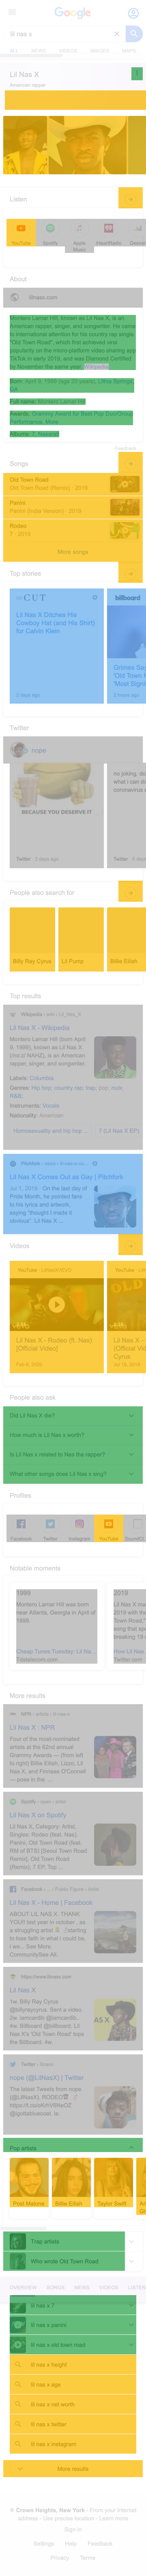

In [34]:
Image.open(fn_painting)